## Data Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


In [7]:
df = pd.read_csv('../data/raw/Titanic.csv')

In [8]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [9]:
df.tail()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
886,male,27.0,0,0,13.00,S,Second,man,True,0
887,female,19.0,0,0,30.00,S,First,woman,True,1
888,female,NaN,1,2,23.45,S,Third,woman,False,0
889,male,26.0,0,0,30.00,C,First,man,True,1
890,male,32.0,0,0,7.75,Q,Third,man,True,0


In [ ]:
df.info() # checking for breif decription about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [11]:
# statistical overview
df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [13]:
for col in df.columns.tolist():
    if df[col].nunique() > 5:
        print(f"Col {col} has {df[col].nunique()} unique values")
    else:
        print(f"Col {col} uniques values: {df[col].unique()}")

Col sex uniques values: ['male' 'female']
Col age has 88 unique values
Col sibsp has 7 unique values
Col parch has 7 unique values
Col fare has 248 unique values
Col embarked uniques values: ['S' 'C' 'Q' nan]
Col class uniques values: ['Third' 'First' 'Second']
Col who uniques values: ['man' 'woman' 'child']
Col alone uniques values: [False  True]
Col survived uniques values: [0 1]


## Data Cleaning

In [14]:
df.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [21]:
# filling age with the median value

df = df.fillna({'age': df['age'].median(), 'embarked': df['embarked'].mode()[0]})

In [22]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [26]:
# converting age into an integer column

df['age'] = df['age'].apply(lambda x: int(x))

In [28]:
# converting alone to integer

df['alone'] = df['alone'].apply(lambda x: int(x))

In [31]:
# changing column name who to identity

df = df.rename({'who': 'identity'}, axis= 1)

In [32]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,identity,alone,survived
0,male,22,1,0,7.2500,S,Third,man,0,0
1,female,38,1,0,71.2833,C,First,woman,0,1
2,female,26,0,0,7.9250,S,Third,woman,1,1
3,female,35,1,0,53.1000,S,First,woman,0,1
4,male,35,0,0,8.0500,S,Third,man,1,0


In [34]:
df['fare'] = df['fare'].apply(lambda x: round(x, 2))

In [35]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,identity,alone,survived
0,male,22,1,0,7.25,S,Third,man,0,0
1,female,38,1,0,71.28,C,First,woman,0,1
2,female,26,0,0,7.92,S,Third,woman,1,1
3,female,35,1,0,53.10,S,First,woman,0,1
4,male,35,0,0,8.05,S,Third,man,1,0


In [36]:
for col in df.columns.tolist():
    if pd.api.types.is_object_dtype(df[col]):
        df[col] = df[col].str.lower()

In [37]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,identity,alone,survived
0,male,22,1,0,7.25,s,third,man,0,0
1,female,38,1,0,71.28,c,first,woman,0,1
2,female,26,0,0,7.92,s,third,woman,1,1
3,female,35,1,0,53.10,s,first,woman,0,1
4,male,35,0,0,8.05,s,third,man,1,0


In [38]:
df.to_csv('../data/processed/cleaned_data.csv', index= False, header= True)

## Exploratory Data Analysis

In [39]:
# Checking and reslving columns related to our target column


In [40]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

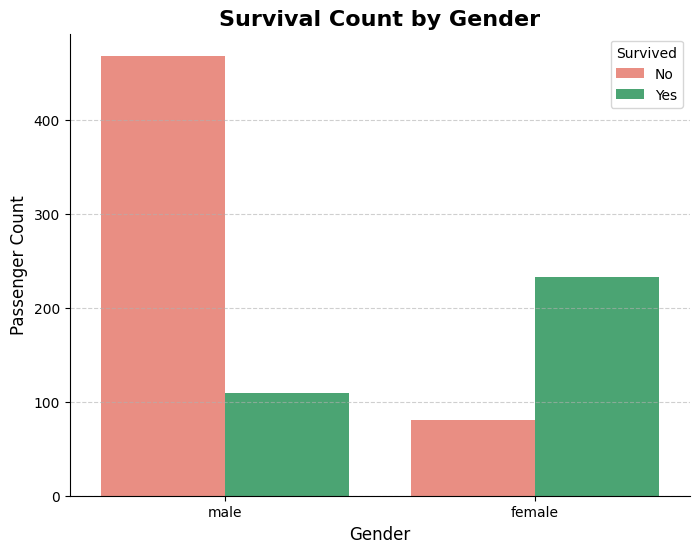

In [45]:
plt.figure(figsize=(8,6))

# Better color palette (green for survived, red for not survived)
sns.countplot(
    data=df, 
    x="sex", 
    hue="survived", 
    palette={0: "salmon", 1: "mediumseagreen"}
)

# Add labels and title
plt.title("Survival Count by Gender", fontsize=16, weight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Passenger Count", fontsize=12)

# Improve legend
plt.legend(title="Survived", labels=["No", "Yes"])

# Add grid for clarity
sns.despine()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

In [43]:
# checking the percent of male and female that survived

survival_rate = round(df.groupby("sex")["survived"].mean() * 100, 2)

print(survival_rate)

sex
female    74.20
male      18.89
Name: survived, dtype: float64


**Observation**:
- More male passengers than female
- More female passengers where saved at the crash than male, with female survival rate about `74.2%` and male about `18.9%`

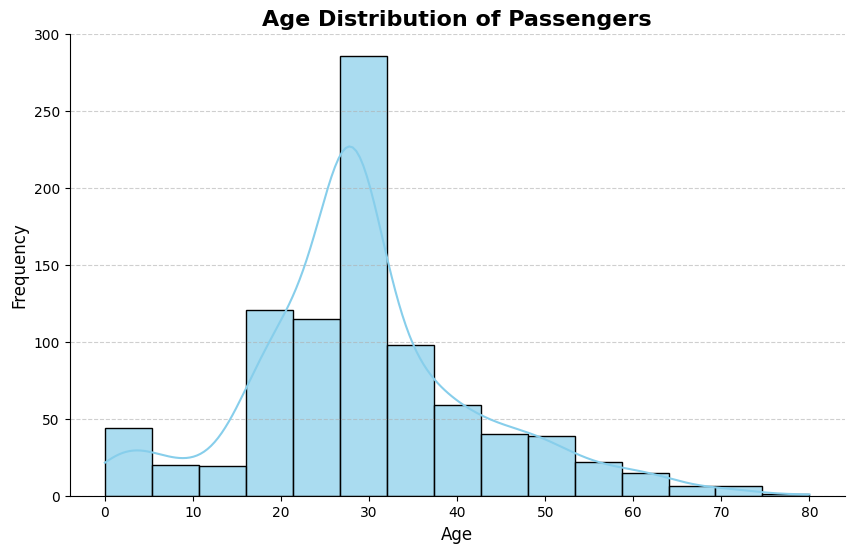

In [50]:
# Age

plt.figure(figsize=(10,6))

# Styled histogram
sns.histplot(
    data=df, 
    x="age", 
    bins=15, 
    kde=True,              # add smooth density curve
    color="skyblue",       # fill color
    edgecolor="black",     # outline bars
    alpha=0.7              # transparency for softer look
)

# Titles & labels
plt.title("Age Distribution of Passengers", fontsize=16, weight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Grid & clean style
sns.despine()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

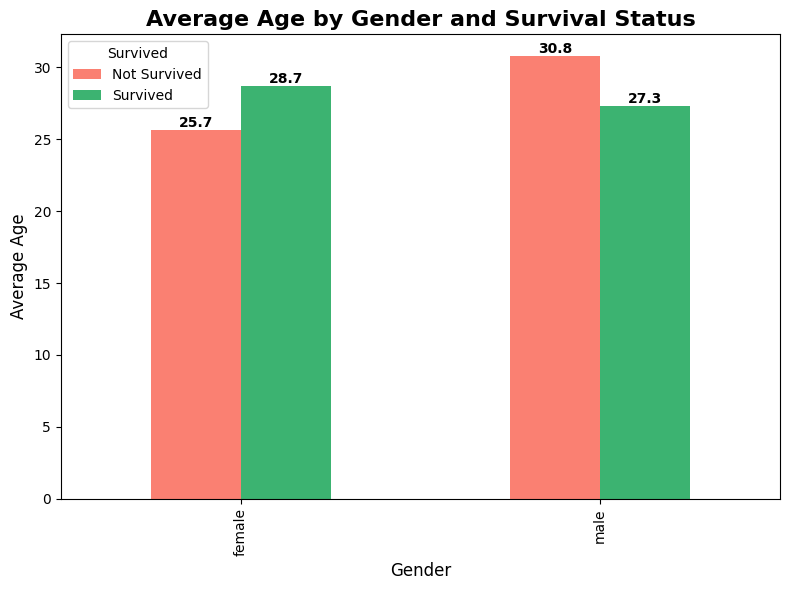

In [52]:
# Calculate average age for survived and not survived passengers per gender
avg_age_gender_survival = df.groupby(['sex', 'survived'])['age'].mean().unstack()

# Plotting
ax = avg_age_gender_survival.plot(kind='bar', figsize=(8,6), color=['salmon', 'mediumseagreen'])

plt.title('Average Age by Gender and Survival Status', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.legend(['Not Survived', 'Survived'], title='Survived')

# Add numbers on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [59]:
numerical_features = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'survived']
categorical_features = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col])]

In [60]:
len(numerical_features), len(categorical_features)

(5, 4)

In [ ]:
def plot_dashboard(df: pd.DataFrame, numerical_cols: list, categorical_cols: list, target_col: str):
    """
    Create a dashboard-style plot:
    - Numerical columns: histograms with target as hue
    - Categorical columns: countplots with target as hue
    - Layout: alternating pattern of (num, num, cat) and (cat, cat, num)
    
    Args:
        df (pd.DataFrame): Dataset
        numerical_cols (list): List of numerical column names
        categorical_cols (list): List of categorical column names
        target_col (str): Target column name
    """
    
    sns.set_theme(style="whitegrid")
    
    # Calculate number of rows needed
    total_plots = len(numerical_cols) + len(categorical_cols)
    nrows = (total_plots // 3) + 1
    
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*5))
    axes = axes.flatten()
    
    # Merge col order in alternating pattern
    plot_order = []
    num_idx, cat_idx = 0, 0
    
    while num_idx < len(numerical_cols) or cat_idx < len(categorical_cols):
        # Row pattern: num, num, cat
        if num_idx < len(numerical_cols):
            plot_order.append(("num", numerical_cols[num_idx])); num_idx += 1
        if num_idx < len(numerical_cols):
            plot_order.append(("num", numerical_cols[num_idx])); num_idx += 1
        if cat_idx < len(categorical_cols):
            plot_order.append(("cat", categorical_cols[cat_idx])); cat_idx += 1
        
        # Row pattern: cat, cat, num
        if cat_idx < len(categorical_cols):
            plot_order.append(("cat", categorical_cols[cat_idx])); cat_idx += 1
        if cat_idx < len(categorical_cols):
            plot_order.append(("cat", categorical_cols[cat_idx])); cat_idx += 1
        if num_idx < len(numerical_cols):
            plot_order.append(("num", numerical_cols[num_idx])); num_idx += 1
    
    # Plot each subplot
    for i, (col_type, col) in enumerate(plot_order):
        ax = axes[i]
        
        if col_type == "num":
            sns.histplot(
                data=df, 
                x=col, 
                hue=target_col, 
                bins=20, 
                kde=True,
                palette="tab10",
                alpha=0.7,
                ax=ax
            )
            ax.set_title(f"Distribution of {col}", fontsize=14, weight="bold")
        
        else:  # categorical
            sns.countplot(
                data=df, 
                x=col, 
                hue=target_col, 
                palette="Set2", 
                dodge=True,
                edgecolor="black",
                ax=ax
            )
            ax.set_title(f"Count of {col}", fontsize=14, weight="bold")
        
        ax.set_xlabel(col, fontsize=11)
        ax.set_ylabel("Count", fontsize=11)
        ax.grid(axis="y", linestyle="--", alpha=0.5)
        sns.despine(ax=ax)
    
    # Remove unused subplots
    for j in range(len(plot_order), len(axes)):
        fig.delaxes(axes[j])
    
    # Global title
    plt.suptitle("Dashboard: Numerical & Categorical Distributions by Target", 
                 fontsize=20, weight="bold", y=1.02)
    
    plt.tight_layout()
    plt.show()


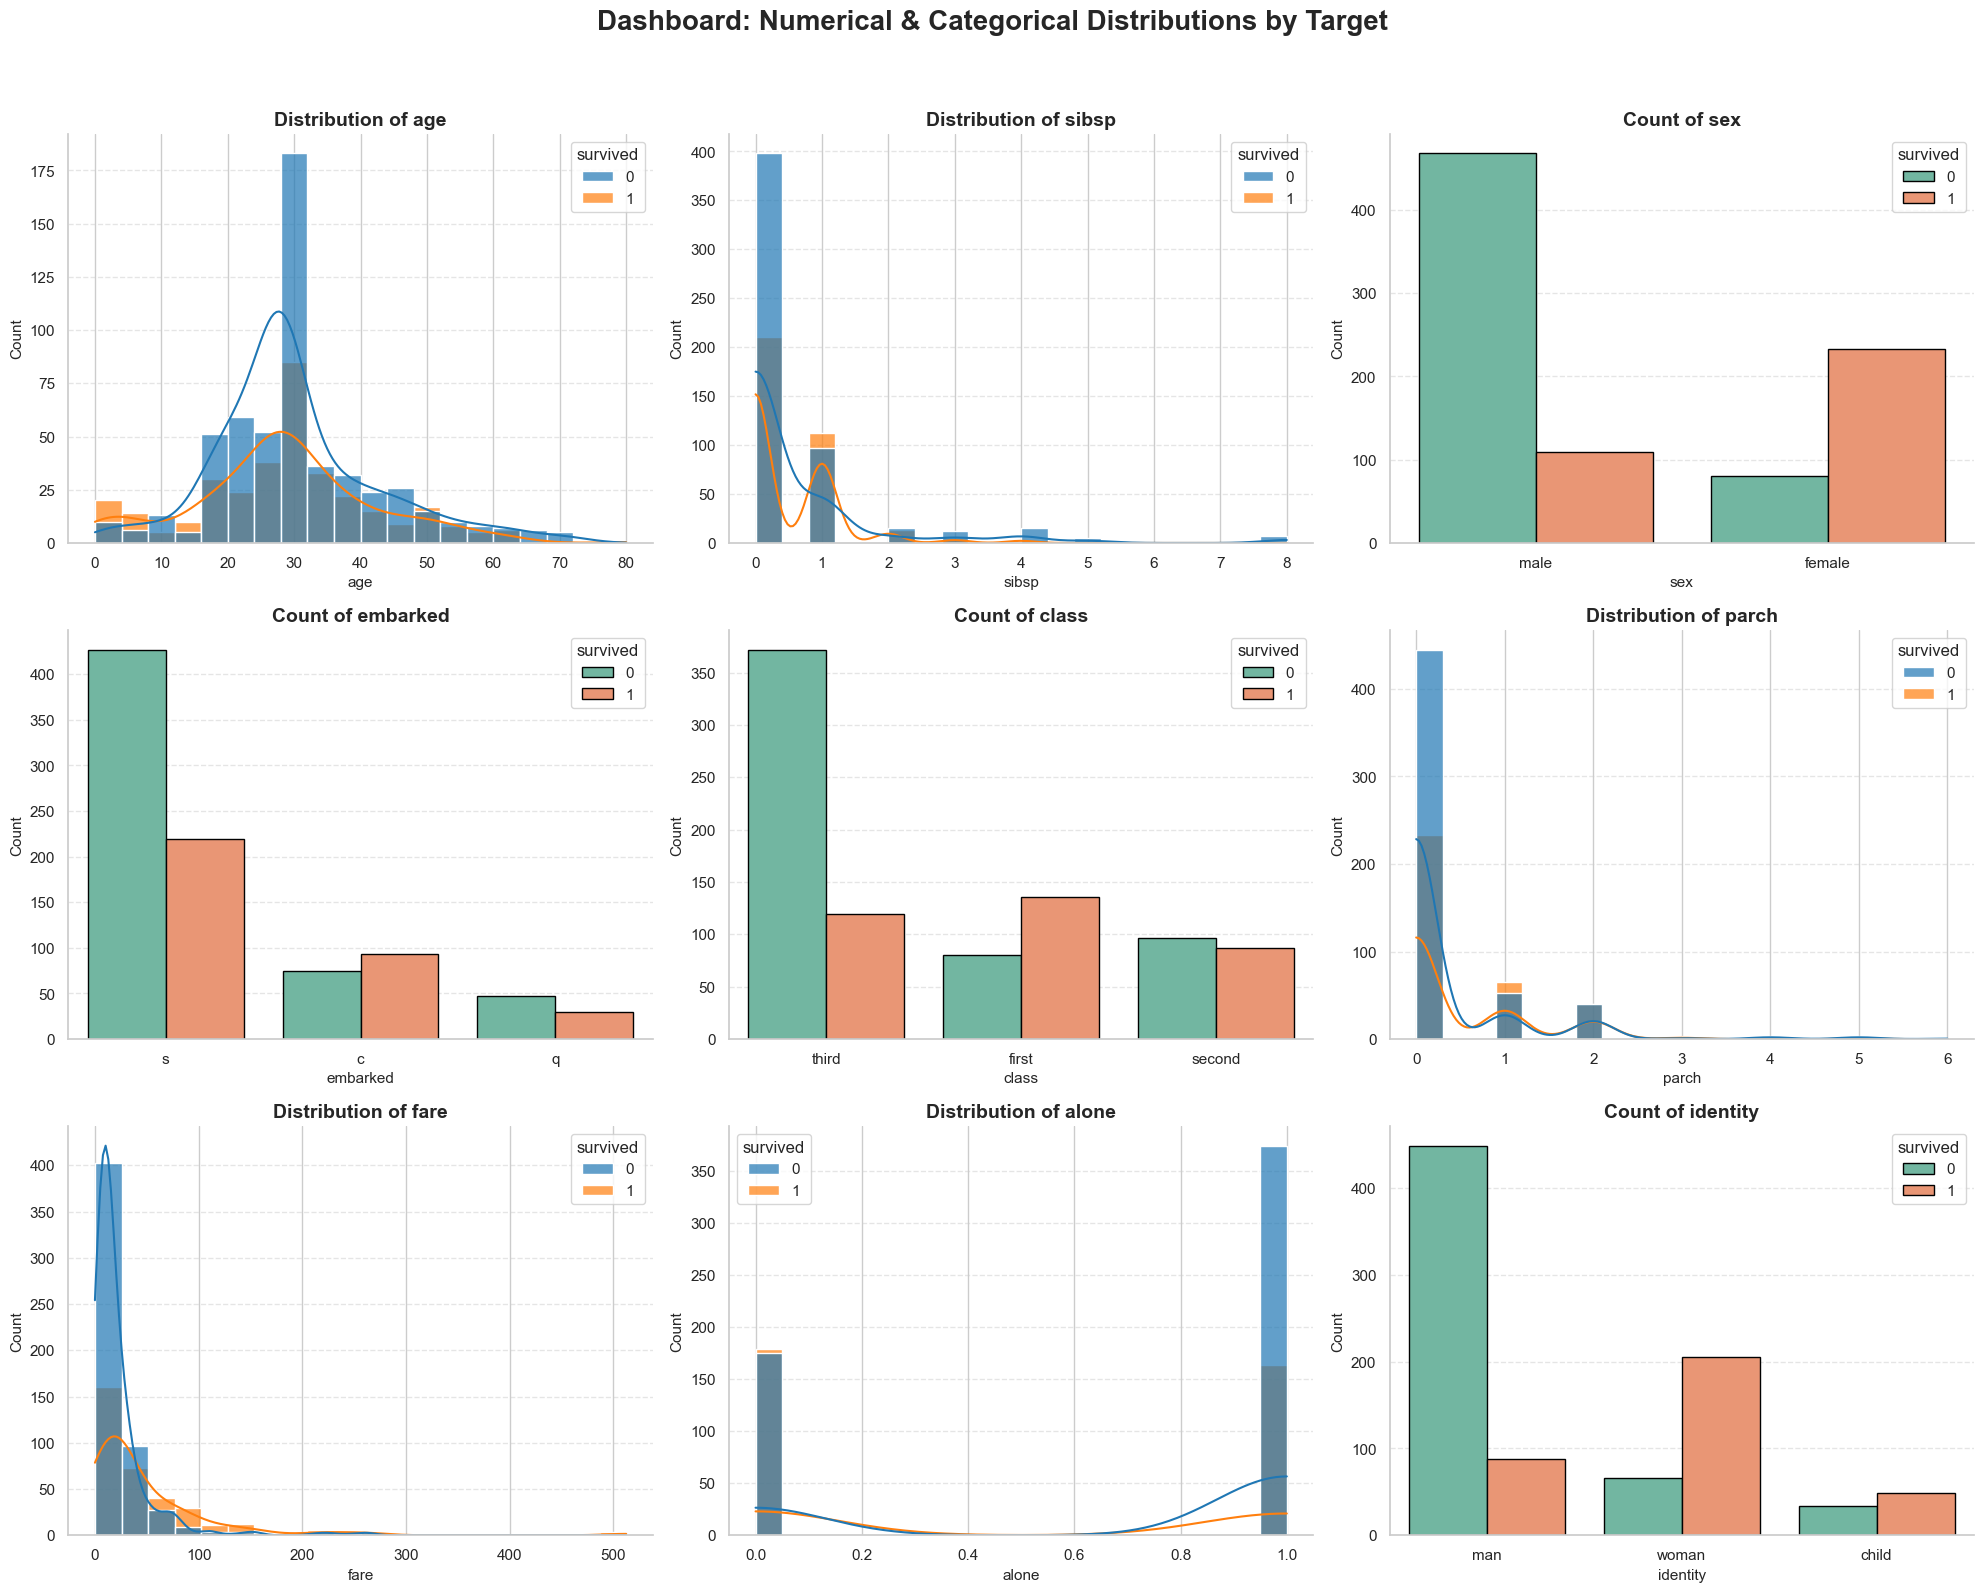

In [62]:
plot_dashboard(df, numerical_features, categorical_features, "survived")

In [63]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64